## Absorbing Markov Chain 
##### Keywords: Linear algebra, Markov Chain

In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as lin
import os






## store current working directory
cwd      = os.getcwd() 

## where we store data files
datapath = cwd + u'/data/'

### Consider a rat in a maze with 3 cells, indexed as 1,2,3 and the outside (freedom), indexed by 4 (that can only be reached via cell 3).  The rat starts initially in a given cell and then takes a move to another cell, continuing to do so until finally reaching freedom. 

### Goal: simulate rat moving around and count steps it takes to get to freedom
<img src="4rat.png" alt="Drawing" style="width: 200px;"/>


In [10]:
S = [1,2,3,4]
import random
import numpy as np

################################################
## start moving from location i, 
## number of steps it takes to get to freedom
## recursion
##############################################
def steps(i):
    #print(i,'->')
    if(i==1):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 2):
        next_move = random.choice([1,3,4])
        return 1+steps(next_move)
        
    if(i == 3):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 4):
        return 0
#for i in range(10):
#    print(steps(2))

### I want to count in general, on average how many steps it takes to start from cell 2 and ends with freedom
<img src="4rat.png" alt="Drawing" style="width: 200px;"/>
### Run N = 100 times, each time compute average of 50 moves


In [5]:
# N experiment
# each experiment N_simulation = 50

start move from cell 1


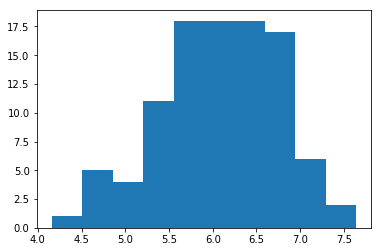

6.0752
start move from cell 2


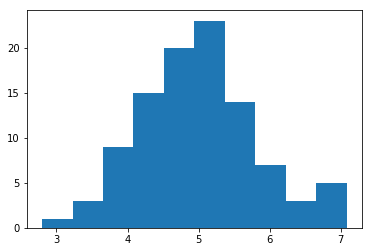

4.9852
start move from cell 3


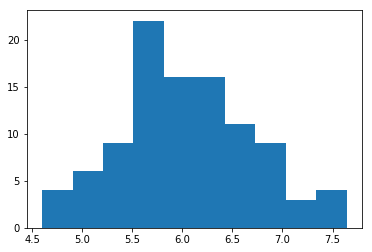

6.034


In [11]:
import matplotlib.pyplot as plt

for start in [1,2,3]:
    Run_total = np.zeros(100)
    N_move    = 50
    print("start move from cell", start)
    for each_run in range(100):
        move = np.zeros(N_move)
        for each_move in range(N_move):
            move[each_move] = steps(start)
        Run_total[each_run] = np.mean(move)
    plt.hist(Run_total,bins = 10)
    plt.show()
    print(Run_total.mean())


### We can also look at the 1-step transition matrix associated with this problem
<img src="4rat.png" alt="Drawing" style="width: 200px;"/>

We have the following:
$$
P = \begin{pmatrix}
0 & 1 & 0 & 0\\
1/3 & 0 & 1/3 & 1/3\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
$$

Then we can set up the canonical form we dicussed in class on Tuesday:
$\begin{pmatrix}
Q &| &R\\
O &| &I\\
\end{pmatrix}$

In [13]:

# Transition matrix
P = np.array(
[[0,1,0,0],
 [1/3,0,1/3,1/3],
 [0,1,0,0],
 [0,0,0,1] 
]
)
print(P)

[[ 0.          1.          0.          0.        ]
 [ 0.33333333  0.          0.33333333  0.33333333]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [17]:
## We have ONE absorption state
##############################
S = [1,2,3,4]
N_absorption = 1

## Q is the upper left square matrix of size
## 4-1 by 4-1
##############################
Q = np.matrix(P[:len(S)-N_absorption, :len(S)-N_absorption])
print(Q)

## R is the upper left square matrix of size
## 4-1 by 4-1
##############################
R = np.matrix(P[:len(S)-N_absorption,-N_absorption:])
print(R
     )
## We need to find N = (I - Q)^(-1)
##############################
diff = np.matrix(np.eye(len(Q)) - Q)
N    = diff**(-1)
print(diff)
print(N)

[[ 0.          1.          0.        ]
 [ 0.33333333  0.          0.33333333]
 [ 0.          1.          0.        ]]
[[ 0.        ]
 [ 0.33333333]
 [ 0.        ]]
[[ 1.         -1.          0.        ]
 [-0.33333333  1.         -0.33333333]
 [ 0.         -1.          1.        ]]
[[ 2.  3.  1.]
 [ 1.  3.  1.]
 [ 1.  3.  2.]]


###  the expected time of being absorbed is Nc
where $c = (1,1,...,1)^T$
### The probability of being absorbed by one of the absorption states is
NR

In [22]:
c = np.ones((len(N),1))
Tabs = N*c
Pabs = N*R
print(Tabs)
print(Pabs)

[[ 6.]
 [ 5.]
 [ 6.]]
[[ 1.]
 [ 1.]
 [ 1.]]


### Drunkard's examples
<img src="drunkard.png" alt="Drawing" style="width: 300px;"/>

similar as before, we can define "steps" and "canonical forms"

###### Goal: simulate drunkard's moves and count steps it takes to get to freedom


In [32]:
S = [0,1,2,3,4]
def steps_drunkard(i):
    #print(i,'->')
    if(i == 3 or i == 4):
        return 0
    
    if(i == 0):
        next_move = random.choice([3,1])
        return 1 + steps_drunkard(next_move)

    if(i == 1):
        next_move = random.choice([0,2])
        return 1 + steps_drunkard(next_move)
    
    if(i == 2):
        next_move = random.choice([4,1])
        return 1 + steps_drunkard(next_move)

steps_drunkard(2)

1

<img src="drunkard.png" alt="Drawing" style="width: 300px;"/>
### I want to count in general, on average how many steps it takes to start from a block  and ends with home or bar


In [33]:
S = [0,1,2,3,4]
N_exp = 100
N_simulations = 50
N_s   = 5
experiments = np.zeros((N_s,N_exp))

In [34]:
for block in S:
    for i in range(N_exp):
        each_experiment = np.zeros(N_simulations)
        for j in range(N_simulations):
            each_experiment[j] = steps_drunkard(block)
        experiments[block,i] = np.mean(each_experiment)


<img src="drunkard.png" alt="Drawing" style="width: 300px;"/>


0 number of moves:  2.9876


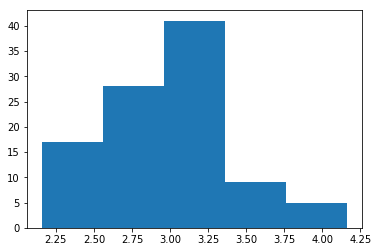

1 number of moves:  3.9588


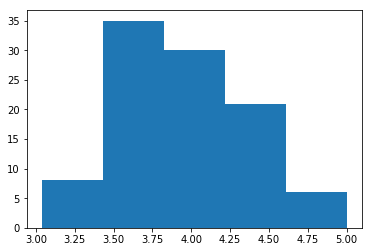

2 number of moves:  2.9648


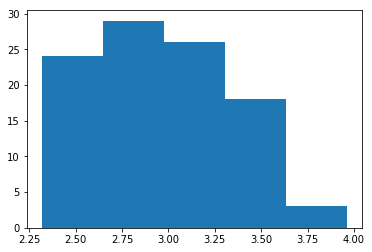

3 number of moves:  0.0


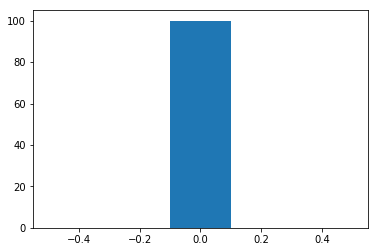

4 number of moves:  0.0


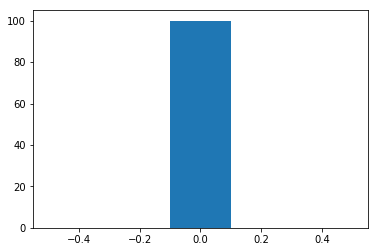

In [39]:
for block in S:
    plt.hist(experiments[block,:],bins = 5)
    print(block,'number of moves: ', np.mean(experiments[block,:]))
    plt.show()

### Now the question remains: given a matrix $A$, in general, how to determine if it is a transition matrix for an absorbing Markov Chain?
To be a transition matrix $A$ needs to satisfy:
 1. $A$ needs to be square matrix
 1. $A$ needs to have all entries $\in[0,1]$ 
 1. Each row of $A$ should have summation 1

Then to be an absorbing Markov Chain's transition matrix, $A$ needs to satisfy:
1. $A$ has absorption state(s)
1. For all other states, there exist at least one path from that state to some absorption states

First, let's write out a function to determine if a matrix is Markov
To be a transition matrix $A$ needs to satisfy:
 1. $A$ needs to be square matrix
 1. $A$ needs to have all entries $\in[0,1]$ 
 1. Each row of $A$ should have summation 1

In [60]:
## if markov
def if_markov(A):
    ## A needs to be a square matrix
    ################################
    shape = A.shape
    if(len(shape) != 2):
        return False
    if(shape[0] != shape[1]):
        return False
            

    ## A all entries between [0 and 1]
    ################################  
    val = np.all(np.logical_and(A >= 0, A <= 1))
    if(val == False):
        return False
    ## each row sum to 1
    ###############################
    rsum = np.round(A.sum(axis = 1),5)
    val = np.all(rsum == 1.)
    return val

In [63]:
A = np.arange(25).reshape(5,5)
A = A/A.sum(axis = 1).reshape((5,1))
A[2,] = [0,0,1,0,0]
A[3,] = [0,0,0,1,0]


Then to be an absorbing Markov Chain's transition matrix, $A$ needs to satisfy:
1. $A$ has absorption state(s)
1. For all other states, there exist at least one path from that state to some absorption states

In [73]:
A = np.arange(25).reshape(5,5)
A = A/A.sum(axis = 1).reshape((5,1))
A[2,] = [0,0,1,0,0]
A[3,] = [0,0,0,1,0]
## swap i = 3, j = 5
def swap(A,i,j):
    r = np.copy(A[j,:])
    A[j,:] = A[i,:]
    A[i,:] = r
    
    c = np.copy(A[:,j])
    A[:,j] = A[:,i]
    A[:,i] = c


In [24]:
## if absorbing
## return value should be the number of absorption states
def if_absmarkov(A):
    
    if(if_markov(A) == False):
        print('not markov')
        return 0
    
    ## diagnoal exists 1, then absorption state(s)
    ############################################
    diag_entry = (np.diag(A) == 1)
    if(np.any(diag_entry) == False):
        print('no absorption')
        return 0
    
    ## I-Q is invertable?
    ## first find Q
    ## To find Q, need to make A into canonical form
    ##################################################
    S     = np.arange(len(A))
    N_abs = np.sum(diag_entry)
    pos   = len(A) - 1
    
    ## if A is already in canonical form
    while(pos>len(A)-1-N_abs):
        if(diag_entry[pos] == True):
            pos -= 1
        else:
            pos = -2
            break
            
    if(pos == -2):
        print('not canonical')
    else:
        print(' canonical')
    
    
    ## Transform A into canonical form
    ######################################
    abs_pos = S[diag_entry] # absorbing states
    otherp  = S[~diag_entry]# transient
    bottom  = -1
    for j in abs_pos:
        if(j<len(A) - N_abs):
            swap(A,j,otherp[bottom])
            bottom -= 1
        else:
            break
            
    if(len(A) == N_abs):
        return len(A)
    
    Q    = A[:len(A) -N_abs,:len(A) - N_abs]
    test = np.eye(len(A) - N_abs) -Q
    eigv = np.round(lin.eigvals(test),5)
    if(np.any(eigv == 0)):
        return 0
    
    return N_abs

In [77]:
diag_entry = (np.diag(A) == 1)
print(diag_entry)
S = np.arange(5)
diag_entry

[False False  True  True False]


array([False, False,  True,  True, False], dtype=bool)

In [81]:
print(abs_pos)
print(otherp)

[2 3]
[0 1 4]


In [82]:
abs_pos = S[diag_entry] # absorbing states
otherp  = S[~diag_entry]# transient
bottom  = -1
N_abs  = np.sum(diag_entry
               )
for j in abs_pos:
    if(j<len(A) - N_abs):
        swap(A,j,otherp[bottom])
        bottom -= 1
    else:
        break
print(A)
## swap row 3 row 5, and then swap col 3 and col 5

[[ 0.          0.1         0.2         0.3         0.4       ]
 [ 0.14285714  0.17142857  0.2         0.22857143  0.25714286]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.18181818  0.19090909  0.2         0.20909091  0.21818182]]


In [25]:
A = np.arange(9).reshape((3,3))
A[2,:] = [0,0,1]
A[:,2] = [0,0,1]
A = A/A.sum(axis = 1).reshape((3,1))

#if_absmarkov(A)
Q = A[:2,:2]
N = np.eye(2)-Q
lin.det(N)

5.5511151231257759e-17

## Once A is transformed into canonical form, we can compute the time to absorption and probability to be absorbed by each state

In [2]:
import numpy as np

A = np.array([
[3/5,3/10,1/10],
[4/5,1/5,0],
[1,0,0],
])

B = np.matrix(A)

print(A*B)
print(B*B)


[[ 0.7   0.24  0.06]
 [ 0.64  0.28  0.08]
 [ 0.6   0.3   0.1 ]]
[[ 0.7   0.24  0.06]
 [ 0.64  0.28  0.08]
 [ 0.6   0.3   0.1 ]]


$$
P^2 = \begin{pmatrix}
0.7  & 0.24 & 0.06\\
0.64 & 0.28 & 0.08\\
0.6  & 0.3  & 0.1
\end{pmatrix}
$$